# 06 Data Answers

Importing libraries.

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading files.

In [434]:
data = pd.read_csv('../01_data/clean_data.csv').iloc[:,1:]
x = pd.read_csv('../01_data/x_tr_mm.csv').iloc[:,1:]
y = pd.read_csv('../01_data/y.csv').iloc[:,1:]

In [537]:
pd.set_option('display.max_columns', None)
data.head()

,subject_id,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e,atopic_derm_start,atopic_derm_end,allergic_rhinitis_start,allergic_rhinitis_end,asthma_start,asthma_end,first_asthmarx,last_asthmarx,num_asthmarx
0,1,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What is the prevalence of food allergies through birth years?

Obtaining the pivot table of birth year per allergy.

In [538]:
allerg_year = pd.pivot_table(data=data, values=[c for c in data.columns if 'start' in c][1:-3], index='birth_year', aggfunc='count')
allerg_year

,egg_start,fish_start,milk_start,nut_start,peanut_start,sesame_start,shellfish_start,soy_start,wheat_start
birth_year,,,,,,,,,
1983,1,2,1,0,0,0,0,0,0
1984,1,2,1,0,0,0,2,0,0
1985,2,6,3,1,5,0,10,1,0
1986,1,5,3,1,8,0,24,1,1
1987,5,13,8,1,15,0,29,3,5
1988,10,18,17,3,43,0,60,2,3
1989,21,29,33,8,45,1,94,14,7
1990,23,32,51,10,55,2,118,21,11
1991,32,50,55,9,92,1,167,11,7


Obtaining total subjects per allery.

In [539]:
allerg_count = allerg_year_count.sum(axis=0)
allerg_count

egg_start          6064
fish_start         1796
milk_start         7289
nut_start          1845
peanut_start       8652
sesame_start        766
shellfish_start    5246
soy_start          2419
wheat_start        1145
dtype: int64

Obtaining percentage of subjects per birth year within each allegy.

In [540]:
year_allerg_perc = allerg_year.divide(allerg_count, axis=1)*100
year_allerg_perc.columns = [c.split('_')[0] for c in allerg_year.columns]

In [541]:
year_allerg_perc

,egg,fish,milk,nut,peanut,sesame,shellfish,soy,wheat
birth_year,,,,,,,,,
1983,0.016491,0.111359,0.013719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.016491,0.111359,0.013719,0.000000,0.000000,0.000000,0.038124,0.000000,0.000000
1985,0.032982,0.334076,0.041158,0.054201,0.057790,0.000000,0.190621,0.041339,0.000000
1986,0.016491,0.278396,0.041158,0.054201,0.092464,0.000000,0.457491,0.041339,0.087336
1987,0.082454,0.723831,0.109754,0.054201,0.173370,0.000000,0.552802,0.124018,0.436681
1988,0.164908,1.002227,0.233228,0.162602,0.496995,0.000000,1.143729,0.082679,0.262009
1989,0.346306,1.614699,0.452737,0.433604,0.520111,0.130548,1.791841,0.578752,0.611354
1990,0.379288,1.781737,0.699684,0.542005,0.635691,0.261097,2.249333,0.868127,0.960699
1991,0.527704,2.783964,0.754562,0.487805,1.063338,0.130548,3.183378,0.454733,0.611354


 \
 \
Plotting results.

Text(0.5, 0, 'Birth year')

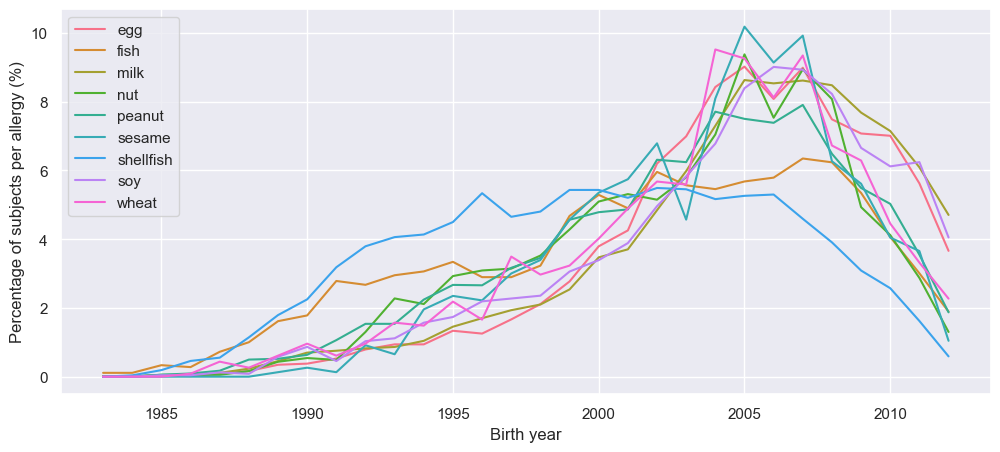

In [563]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=year_allerg_perc, palette='husl', dashes=False)
ax.set_ylabel('Percentage of subjects per allergy (%)')
ax.set_xlabel('Birth year')

### Remarks:

Food allergies have a very similar behaviour, peaking around 2005.\
\
Shellfish and Fish are two food allergies that increase earlier, having shellfish peak around 1999-2000.\
\
The cohort study started in 2001, and, from that date beyond, data started to be collected, specially on new born subjects. Therefore, it is expected that a higher amount of subjects born after 2001 is being recorded in this study.

## What is the most common food allergy per birth year?

Obtaining number of subjects per birth year.

In [543]:
year_count = pd.pivot_table(data=data, values='subject_id', index='birth_year', aggfunc='count')
year_count = list(year_count.iloc[:,0])

 \
 \
Obtaining percentage of subjects per allegy within each birth year.

In [544]:
allerg_year_perc = allerg_year_count.divide(year_count, axis=0)*100
allerg_year_perc.columns = [c.split('_')[0] for c in allerg_y.columns]

In [545]:
allerg_year_perc

,egg,fish,milk,nut,peanut,sesame,shellfish,soy,wheat
birth_year,,,,,,,,,
1983,11.111111,22.222222,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.793651,1.587302,0.793651,0.000000,0.000000,0.000000,1.587302,0.000000,0.000000
1985,0.420168,1.260504,0.630252,0.210084,1.050420,0.000000,2.100840,0.210084,0.000000
1986,0.081900,0.409500,0.245700,0.081900,0.655201,0.000000,1.965602,0.081900,0.081900
1987,0.195312,0.507812,0.312500,0.039062,0.585938,0.000000,1.132812,0.117188,0.195312
1988,0.225276,0.405497,0.382969,0.067583,0.968687,0.000000,1.351656,0.045055,0.067583
1989,0.338164,0.466989,0.531401,0.128824,0.724638,0.016103,1.513688,0.225443,0.112721
1990,0.305973,0.425702,0.678462,0.133032,0.731675,0.026606,1.569775,0.279367,0.146335
1991,0.373439,0.583499,0.641849,0.105030,1.073638,0.011670,1.948886,0.128370,0.081690


 \
 \
Plotting results.   

Text(0.5, 0, 'Birth year')

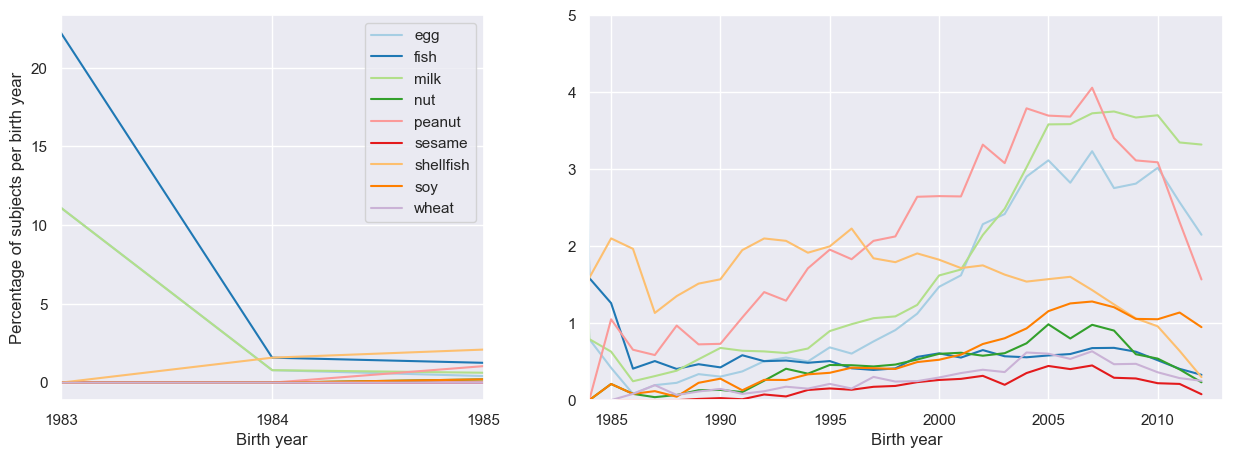

In [568]:
sns.set_style("darkgrid")

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), width_ratios=[2,3])

sns.lineplot(data=allerg_year_perc, palette='Paired', dashes=False, ax=ax[0])
sns.lineplot(data=allerg_year_perc, palette='Paired', dashes=False, ax=ax[1], legend=False)

ax[0].set_xlim(1983,1985)
ax[0].set_xticks([1983, 1984, 1985])
ax[0].set_ylabel('Percentage of subjects per birth year (%)')
ax[0].set_xlabel('Birth year')

ax[1].set_xlim(1984,2013)
ax[1].set_ylim(0,5)
ax[1].set_xlabel('Birth year')


Text(0.5, 0, 'Birth year')

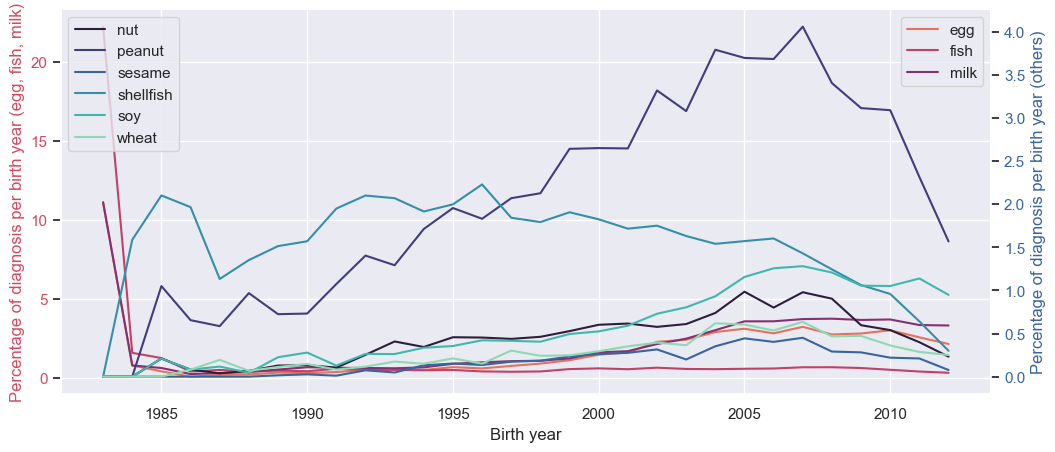

In [547]:
fig,ax1 = plt.subplots(figsize=(12,5))

ax2= ax1.twinx()

sns.lineplot(data=allerg_year_perc.iloc[:,3:], palette='mako', dashes=False, ax=ax2)

pal = sns.color_palette('mako')
ax2.tick_params(axis='y', labelcolor=pal.as_hex()[2])
ax2.set_ylabel('Percentage of diagnosis per birth year (others)', color=pal.as_hex()[2])

sns.lineplot(data=allerg_year_perc.iloc[:,0:3], palette='flare', dashes=False, ax=ax1)

pal = sns.color_palette('flare')
ax1.tick_params(axis='y', labelcolor=pal.as_hex()[2])
ax1.set_ylabel('Percentage of diagnosis per birth year (egg, fish, milk)', color=pal.as_hex()[2])

ax1.set_xlabel('Birth year')
#plt.legend(allerg_y.columns)

### Remarks:

Egg, fish and milk are the most prevalent food allergies in subjects born in 1983.\
\
From that date, egg, milk, peanut and shellfish are the most prevalent ones until the end of the cohort study.\
\
Soy allergy surpassing shellfish in 2010.\
\
Between 1993 and 2001, nut allergy was more prevalent than soy.

## What is the prevalence of eczema, asthma, and rhinitis through age?

Creating bins for ages at the start of the follow-up.

In [548]:
age_list = pd.cut(list(data.iloc[:,2]), [0, 3, 6, 9, 12, 15, 18], labels=['[0,3]','(3,6]','(6,9]','(9,12]','(12,15]','(15,18]'], include_lowest=True)

 \
 \
Plottinf number of subjects per bin.

Text(0, 0.5, 'Number of subjects')

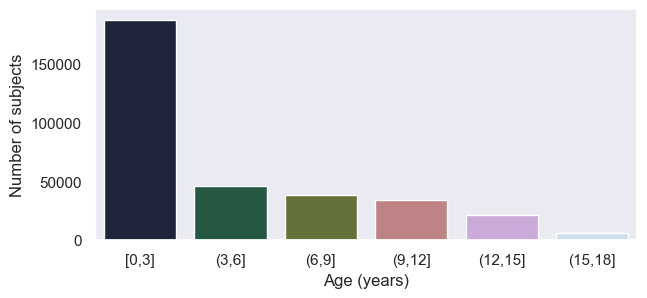

In [549]:
sns.set_theme(style="dark", palette=None)

fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(x = age_list, palette='cubehelix')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Number of subjects')

In [550]:
data['age_start_bin'] = age_list

 \
 \
Obtaning number of subjects per condition per age bin.

In [551]:
cond_age = pd.pivot_table(data=data, values=['atopic_derm_start', 'allergic_rhinitis_start', 'asthma_start'], 
                                    index='age_start_bin', aggfunc='count')

Obtaining number in each bin.

In [552]:
bin_count = cond_age.sum(axis=1)

Obtaining percentage of subjects per condition within each age bin.

In [553]:
cond_age_perc = (cond_age.div(bin_count, axis=0)*100).reset_index()
cond_age_perc.columns = ['age_start_bin','rhinitis','asthma','eczema']

In [554]:
cond_age_perc

,age_start_bin,rhinitis,asthma,eczema
0,"[0,3]",27.767320,36.083495,36.149185
1,"(3,6]",39.476782,40.122261,20.400957
2,"(6,9]",41.490968,39.913582,18.595450
3,"(9,12]",41.348215,41.008205,17.643580
4,"(12,15]",41.915982,41.915982,16.168036
5,"(15,18]",40.688686,40.688686,18.622628


Plotting results.

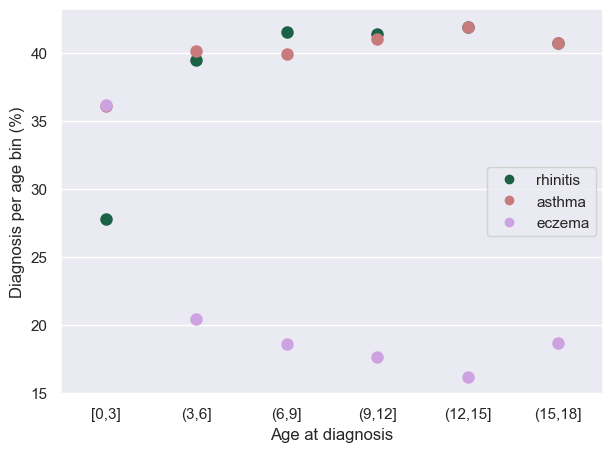

In [569]:
sns.set_style("darkgrid")

fig,ax = plt.subplots(figsize=(7,5))

pal = sns.color_palette('cubehelix')

sns.stripplot(data=cond_age_perc, x='age_start_bin', y='rhinitis', size=9, color=pal.as_hex()[1], ax=ax)
sns.stripplot(data=cond_age_perc, x='age_start_bin', y='asthma', size=9, color=pal.as_hex()[3], ax=ax)
sns.stripplot(data=cond_age_perc, x='age_start_bin', y='eczema', size=9, color=pal.as_hex()[4], ax=ax)
ax.set_ylabel('Diagnosis per age bin (%)')
ax.set_xlabel('Age at diagnosis')

import matplotlib.lines as mlines
colors= [pal.as_hex()[1], pal.as_hex()[3], pal.as_hex()[4]]
lines = [mlines.Line2D([0], [0], color=c, linewidth=0, marker='o') for c in colors]
labels = ['rhinitis','asthma','eczema']
plt.legend(lines,labels, loc=7)

### Remarks:

Between 0 and 3 years, most prevalent conditions are asthma eczema.\
\
Between 3 and 18 years, rhinitis and asthma are the most prevalent ones.

## Are food allergies related with dermatological/respiratory allergies?

Counting number of subjects per number of allergies per dermatological/respiratory allergies

In [556]:
cond_allerg = pd.pivot_table(data=data, values=['atopic_derm_start', 'allergic_rhinitis_start', 'asthma_start'], index='allerg_c_s', aggfunc='count')
cond_allerg

,allergic_rhinitis_start,asthma_start,atopic_derm_start
allerg_c_s,,,
0,47771,54940,42007
1,4556,5354,4147
2,1624,1824,1599
3,801,870,861
4,434,466,492
5,223,239,232
6,98,114,107
7,24,25,31
8,21,24,20


In [557]:
cond_allerg.loc['5+'] = list(cond_allerg.iloc[5:,:].sum(axis=0))
cond_allerg

,allergic_rhinitis_start,asthma_start,atopic_derm_start
allerg_c_s,,,
0,47771,54940,42007
1,4556,5354,4147
2,1624,1824,1599
3,801,870,861
4,434,466,492
5,223,239,232
6,98,114,107
7,24,25,31
8,21,24,20


In [558]:
cond_allerg = cond_allerg.drop(index=[5,6,7,8,9,10,11,13])
cond_allerg

,allergic_rhinitis_start,asthma_start,atopic_derm_start
allerg_c_s,,,
0,47771,54940,42007
1,4556,5354,4147
2,1624,1824,1599
3,801,870,861
4,434,466,492
5+,379,414,404


 \
 \
Counting number of subjects per number of allergies.

In [559]:
subj_allerg = pd.pivot_table(data=data, values='subject_id', index='allerg_c_s', aggfunc='count')
subj_allerg

,subject_id
allerg_c_s,
0,310565
1,15183
2,4132
3,1757
4,860
5,410
6,172
7,44
8,31


In [560]:
subj_allerg.loc['5+'] = list(subj_allerg.iloc[5:,:].sum(axis=0))
subj_allerg

,subject_id
allerg_c_s,
0,310565
1,15183
2,4132
3,1757
4,860
5,410
6,172
7,44
8,31


In [572]:
#subj_allerg = subj_allerg.drop(index=[5,6,7,8,9,10,11,13])
subj_allerg

,subject_id
allerg_c_s,
0,310565
1,15183
2,4132
3,1757
4,860
5+,678


In [578]:
cond_allerg_perc = cond_allerg.div(list(subj_allerg.iloc[:,0]),axis=0)*100
cond_allerg_perc.columns = ['rhinitis','asthma','eczema']
cond_allerg_perc

,rhinitis,asthma,eczema
allerg_c_s,,,
0,15.381965,17.690339,13.525993
1,30.007245,35.263123,27.313443
2,39.303001,44.143272,38.697967
3,45.589072,49.516221,49.003984
4,50.465116,54.186047,57.209302
5+,55.899705,61.061947,59.587021


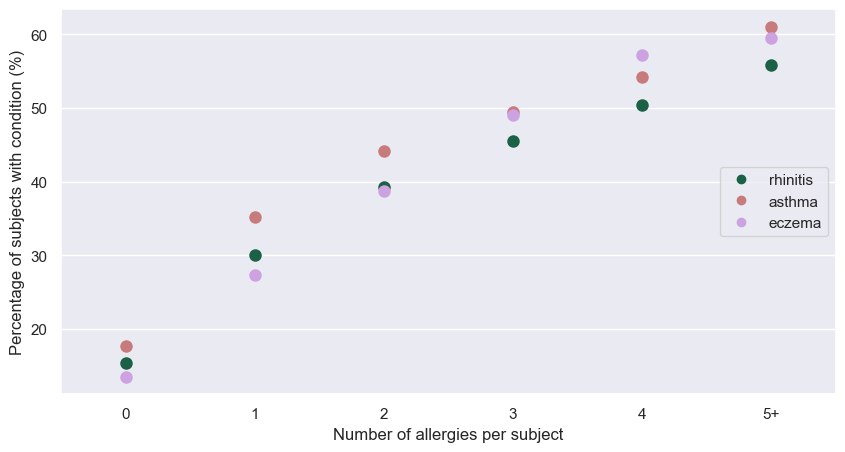

In [589]:
sns.set_style("darkgrid")

fig,ax = plt.subplots(figsize=(10,5))

sns.stripplot(cond_allerg_perc, x='allerg_c_s', y='rhinitis', size=9, color=pal.as_hex()[1], ax=ax)
sns.stripplot(cond_allerg_perc, x='allerg_c_s', y='asthma', size=9, color=pal.as_hex()[3], ax=ax)
sns.stripplot(cond_allerg_perc, x='allerg_c_s', y='eczema', size=9, color=pal.as_hex()[4], ax=ax)

ax.set_ylabel('Percentage of subjects with condition (%)')
ax.set_xlabel('Number of allergies per subject')

colors= [pal.as_hex()[1], pal.as_hex()[3], pal.as_hex()[4]]
lines = [mlines.Line2D([0], [0], color=c, linewidth=0, marker='o') for c in colors]
labels = ['rhinitis','asthma','eczema']
plt.legend(lines,labels, loc=7)

### Remarks:

There is a clear increase of dermatologic/respiratory allergy with the presence and increase of food allergies.

## What food allergies are more related with developing a dermatological/respiratory allergy?

To answer this question, firstly, a heatmap will be created

In [590]:
x.head()

,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e
0,0.787425,0.039610,0.169300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
1,0.371225,0.906513,0.994900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
2,0.787425,0.004885,0.395871,NaN,NaN,NaN,NaN,0.373186,0.425877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.999989,0.999994
3,0.717234,0.487443,0.528840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
4,0.787425,0.006096,0.364430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000


In [591]:
y.head()

,atopic_derm_start,atopic_derm_end,allergic_rhinitis_start,allergic_rhinitis_end,asthma_start,asthma_end,first_asthmarx,last_asthmarx,num_asthmarx
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [592]:
xy = pd.concat([x,y.iloc[:,0:-3]], axis=1)

In [593]:
xy.columns

Index(['birth_year', 'age_start_years', 'age_end_years', 'shellfish_start',
       'shellfish_end', 'fish_start', 'fish_end', 'milk_start', 'milk_end',
       'soy_start', 'soy_end', 'egg_start', 'egg_end', 'wheat_start',
       'wheat_end', 'peanut_start', 'peanut_end', 'sesame_start', 'sesame_end',
       'nut_start', 'nut_end', 'nut_c_s', 'nut_c_e', 'allerg_c_s',
       'allerg_c_e', 'atopic_derm_start', 'atopic_derm_end',
       'allergic_rhinitis_start', 'allergic_rhinitis_end', 'asthma_start',
       'asthma_end'],
      dtype='object')

In [594]:
xy_corr = xy.drop(['birth_year','age_start_years','age_end_years'], axis=1).corr()[['atopic_derm_start'
    ,'allergic_rhinitis_start','asthma_start','atopic_derm_end', 'allergic_rhinitis_end', 'asthma_end']]

xy_corr

,atopic_derm_start,allergic_rhinitis_start,asthma_start,atopic_derm_end,allergic_rhinitis_end,asthma_end
shellfish_start,0.752599,0.750924,0.739581,0.756208,0.802156,0.820536
shellfish_end,0.726721,0.714393,0.681096,0.736258,0.808348,0.761379
fish_start,0.738749,0.732380,0.714961,0.773393,0.799292,0.819898
fish_end,0.708313,0.703646,0.665200,0.746369,0.802363,0.880592
milk_start,0.650351,0.607625,0.619790,0.658656,0.709995,0.762550
milk_end,0.578545,0.507065,0.517277,0.602406,0.640130,0.704100
soy_start,0.642081,0.684097,0.673341,0.681970,0.742929,0.790111
soy_end,0.557165,0.579669,0.544649,0.595880,0.651124,0.730859
egg_start,0.649442,0.587158,0.598459,0.634047,0.626806,0.725675
egg_end,0.626763,0.525507,0.543505,0.601930,0.562975,0.695835


Selecting correlations equal or higher than 0.7.

In [618]:
xy_corr[xy_corr >= 0.7]

,atopic_derm_start,allergic_rhinitis_start,asthma_start,atopic_derm_end,allergic_rhinitis_end,asthma_end
shellfish_start,0.752599,0.750924,0.739581,0.756208,0.802156,0.820536
shellfish_end,0.726721,0.714393,NaN,0.736258,0.808348,0.761379
fish_start,0.738749,0.732380,0.714961,0.773393,0.799292,0.819898
fish_end,0.708313,0.703646,NaN,0.746369,0.802363,0.880592
milk_start,NaN,NaN,NaN,NaN,0.709995,0.762550
milk_end,NaN,NaN,NaN,NaN,NaN,0.704100
soy_start,NaN,NaN,NaN,NaN,0.742929,0.790111
soy_end,NaN,NaN,NaN,NaN,NaN,0.730859
egg_start,NaN,NaN,NaN,NaN,NaN,0.725675
egg_end,NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
xy_corr_7 = xy_corr.drop(['milk_start','soy_start','egg_start','egg_end','peanut_start','sesame_start','nut_start',
                            'nut_c_s', 'nut_c_e','allerg_c_s','allerg_c_e','atopic_derm_start','allergic_rhinitis_start',
                            'asthma_start','atopic_derm_end', 'allergic_rhinitis_end', 'asthma_end'])

<AxesSubplot: >

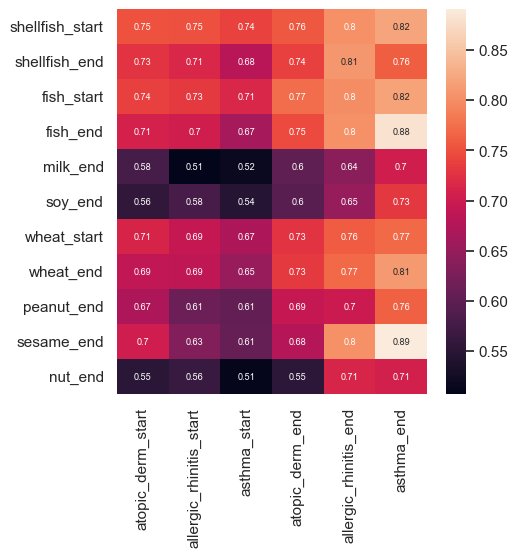

In [617]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(xy_corr_7, annot=True, annot_kws={"size": 35 / np.sqrt(len(xy_corr))})

### Remarks:

Shellfish, Fish and Wheat are the food allergies with higher correlation to dermatological and respiratory allergies.